# Deep MNIST

Improve the accuracy of MNIST

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Set up

In [2]:
# Load MNIST Data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
#start TensorFolw InteractiveSession
sess = tf.InteractiveSession()

# Build a Softmax Regression Model

In this section, single linear layer 

In [4]:
#Placeholders
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [5]:
# Variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
sess.run(tf.global_variables_initializer())

In [6]:
# Predicted Class and Loss Function
y = tf.matmul(x, W) + b
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

# Train the Model

In [7]:
# steepest gradient descent
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

# Evaluate the Model

In [8]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
result = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
print( "Accuracy of single layer model : {}".format(result))

Accuracy of single layer model : 0.9165999889373779


# Build a Multilayer Convolutional Network

In [9]:
# Weight Initialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [10]:
# Convolution and Pooling
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding="SAME")

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")

In [11]:
# First Convolutional Layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

#reshape x to a 4d tensor
x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1) #reduce the image size to 14x14

In [12]:
# Second Convolutional Layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2) #reduce the image size to 7x7

In [13]:
# Densely Connected Layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [14]:
# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [15]:
#Readout Layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [16]:
# Train and Evaluate the Model
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
epochAccuracy_lst = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
            epochAccuracy_lst.append(train_accuracy)
            print("step {0}, training accuracy {1}".format(i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
        
    print("test accuracy {}".format(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})))

step 0, training accuracy 0.1599999964237213
step 100, training accuracy 0.8399999737739563
step 200, training accuracy 0.8199999928474426
step 300, training accuracy 0.8999999761581421
step 400, training accuracy 0.8999999761581421
step 500, training accuracy 0.8399999737739563
step 600, training accuracy 0.9800000190734863
step 700, training accuracy 0.9800000190734863
step 800, training accuracy 0.9399999976158142
step 900, training accuracy 0.9599999785423279
step 1000, training accuracy 0.9200000166893005
step 1100, training accuracy 0.9800000190734863
step 1200, training accuracy 0.9599999785423279
step 1300, training accuracy 0.9399999976158142
step 1400, training accuracy 0.9599999785423279
step 1500, training accuracy 0.9399999976158142
step 1600, training accuracy 0.9399999976158142
step 1700, training accuracy 0.9599999785423279
step 1800, training accuracy 0.9800000190734863
step 1900, training accuracy 0.9800000190734863
step 2000, training accuracy 0.9399999976158142
step

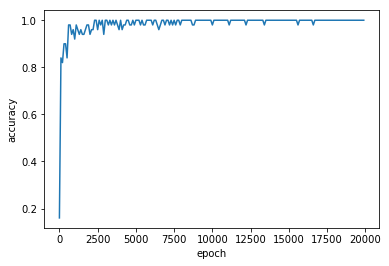

In [17]:
xAxis = []
for i in range(0, 20000, 100):
    xAxis.append(i)
plt.plot(xAxis, epochAccuracy_lst)
plt.xlabel("epoch")
plt.ylabel("accuracy")